In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Activation,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
import numpy as np
import shutil
import itertools
import glob
import random
warnings.simplefilter(action = 'ignore',category = FutureWarning)
%matplotlib inline

In [128]:
os.chdir('C:/Users/VEDIT/Desktop/machine learning/data/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    for c in random.sample(glob.glob('cat*'),500):
        shutil.move(c,'train/cat')
    
    for c in random.sample(glob.glob('dog*'),500):
        shutil.move(c,'train/dog')
        
    for c in random.sample(glob.glob('cat*'),100):
        shutil.move(c,'valid/cat')
        
    for c in random.sample(glob.glob('dog*'),100):
        shutil.move(c,'valid/dog')
        
    for c in random.sample(glob.glob('cat*'),50):
        shutil.move(c,'test/cat')
        
    for c in random.sample(glob.glob('dog*'),50):
        shutil.move(c,'test/dog')
    

In [129]:
os.chdir('C:/Users/VEDIT/Desktop/machine learning')

In [130]:
train_path = 'data/dogs-vs-cats/train'
test_path = 'data/dogs-vs-cats/test'
valid_path = 'data/dogs-vs-cats/valid'

In [131]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
   .flow_from_directory(directory = train_path,target_size = (224,224),classes= ['cat','dog'],batch_size = 10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
   .flow_from_directory(directory = valid_path,target_size = (224,224),classes= ['cat','dog'],batch_size = 10)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = test_path,target_size = (224,224),classes= ['cat','dog'],batch_size = 10,shuffle = False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [132]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes

In [133]:
imgs,labels = next(train_batches)

In [134]:
def plot_images(images_arr):
    fig,axes = plt.subplots(1,10,figsize = (20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

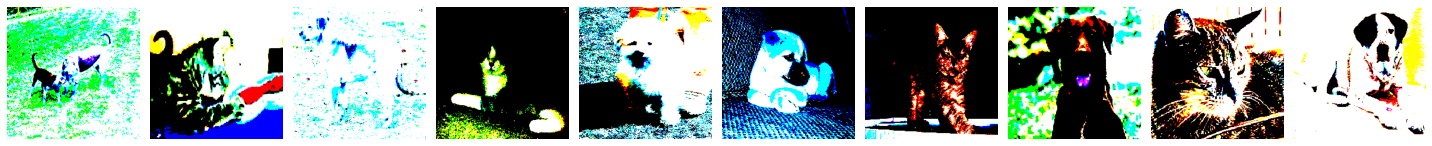

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [135]:
plot_images(imgs)
print(labels)

In [11]:
model = Sequential([
      Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',padding = 'same',input_shape = (224,224,3)),
      MaxPooling2D(pool_size = (2,2),strides = 2),
      Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',padding = 'same'),
      Flatten(),
      Dense(units = 2,activation = 'relu')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 802816)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1605634   
Total params: 1,625,026
Trainable params: 1,625,026
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer = Adam(learning_rate = 0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [200]:
model.fit(x = train_batches,validation_data=valid_batches,epochs = 10,verbose = 2)

Epoch 1/10
100/100 - 105s - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 2/10
100/100 - 113s - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/10
100/100 - 115s - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 4/10
100/100 - 114s - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 5/10
100/100 - 107s - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 6/10
100/100 - 107s - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 7/10
100/100 - 112s - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 8/10
100/100 - 113s - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 9/10
100/100 - 115s - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 10/10
100/100 - 115s - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000


In [91]:
vgg16model = tf.keras.applications.vgg16.VGG16()

In [92]:
vgg16model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [93]:
def count_params(model):
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    return {'non_trainable_params':non_trainable_params,'trainable_params':trainable_params}

In [94]:
params = count_params(vgg16model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 138357544

In [95]:
model = Sequential()
for layer in vgg16model.layers[:-1]:
    model.add(layer)

In [96]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [97]:
for layer in model.layers:
    layer.trainable = False

In [98]:
model.add(Dense(units = 2,activation = 'softmax'))

In [99]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [100]:
params = count_params(model)
assert params['trainable_params'] == 8194
assert params['non_trainable_params'] == 134260544

In [101]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [104]:
model.compile(optimizer = Adam(learning_rate = 0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [105]:
model.fit(x = train_batches,validation_data = valid_batches,epochs = 5,verbose = 2)

Epoch 1/5
100/100 - 1012s - loss: 0.1274 - accuracy: 0.9570 - val_loss: 0.1954 - val_accuracy: 0.9550
Epoch 2/5
100/100 - 1006s - loss: 0.0235 - accuracy: 0.9900 - val_loss: 0.0685 - val_accuracy: 0.9700
Epoch 3/5
100/100 - 1335s - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0495 - val_accuracy: 0.9850
Epoch 4/5
100/100 - 1357s - loss: 0.0015 - accuracy: 0.9990 - val_loss: 0.0678 - val_accuracy: 0.9650
Epoch 5/5
100/100 - 1365s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0398 - val_accuracy: 0.9900


In [107]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [126]:
predictions = model.predict(x = test_batches,verbose = 2)

10/10 - 71s


In [122]:
cm = confusion_matrix(y_true = test_batches.classes,y_pred = np.argmax(predictions,axis = -1))
cm

array([[48,  2],
       [ 1, 49]], dtype=int64)

In [123]:
test_batches.class_indices
from sklearn.metrics import plot_confusion_matrix

In [124]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(model,test_batches,tes,title = "Confusion Matrix")

NameError: name 'tes' is not defined

In [180]:
# plot_confusion_matrix(cm = cm,classes = cm_plot_labels,title = "Confusion Matrix")
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils

## mobile net

In [181]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [182]:
from IPython.display import Image

In [183]:
def prepare_image(file):
    image_path = 'C:/Users/VEDIT/Desktop/mike/'
    img = image.load_img(image_path+file,target_size = (224,224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array,axis = 0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded)

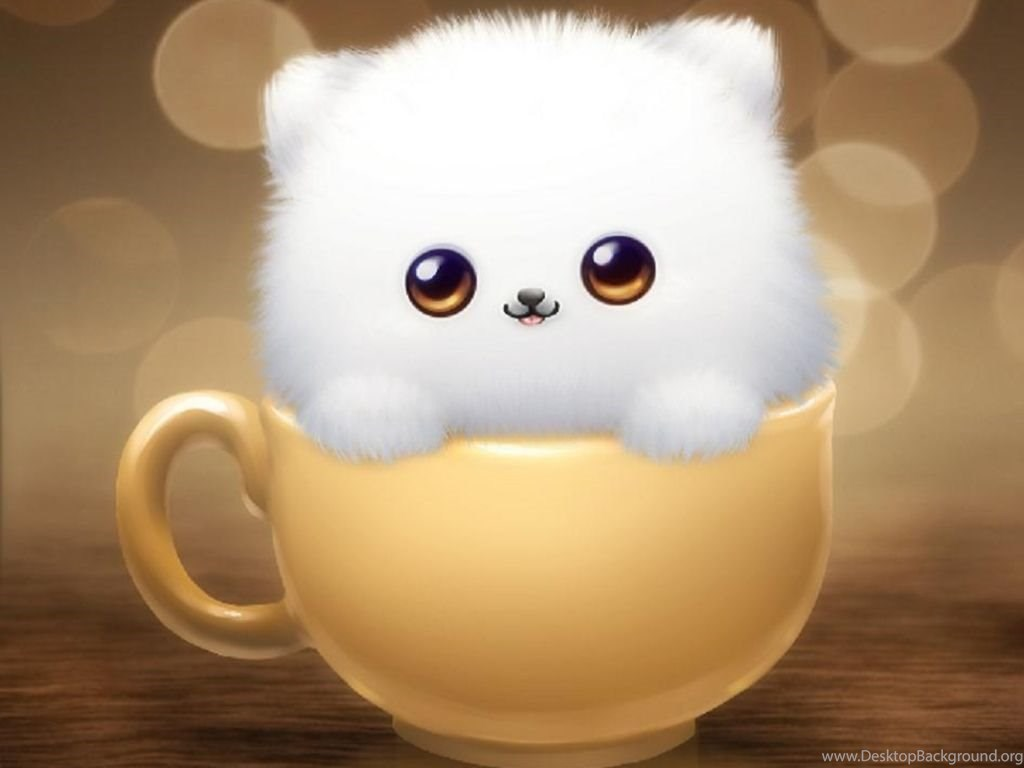

In [184]:
Image(filename = "C:/Users/VEDIT/Desktop/mike/387011_3d-cute-wallpapers-for-desktop-hd-1-jpg_1024x768_h.jpg",width = 300,height = 200)

In [190]:
preprocessed_image = prepare_image('387011_3d-cute-wallpapers-for-desktop-hd-1-jpg_1024x768_h.jpg')
prediction = mobile.predict(preprocessed_image)
result = imagenet_utils.decode_predictions(prediction)
result

[[('n07930864', 'cup', 0.96139723),
  ('n03063599', 'coffee_mug', 0.02090292),
  ('n04399382', 'teddy', 0.00650767),
  ('n04398044', 'teapot', 0.0015426102),
  ('n03950228', 'pitcher', 0.0012560604)]]